# Introduction

This notebook will not run in **binder** until it is rewritten to work with small datasets built into the repository. 

This notebook compares data from rest intervals on the Shallow Profiler with comparable data 
from its 200 meter Platformm at the same time.

Data files: 

```
axb_profiler_backscatter_1Min.nc
axb_profiler_cdom_1Min.nc
axb_profiler_chlora_1Min.nc
axb_profiler_density_1Min.nc
axb_profiler_doxygen_1Min.nc
axb_profiler_nitrate_1Min.nc
axb_profiler_par_1Min.nc
axb_profiler_pco2_1Min.nc
axb_profiler_ph_1Min.nc
axb_profiler_pressure_1Min.nc
axb_profiler_salinity_1Min.nc
axb_profiler_spkir_1Min.nc
axb_profiler_temperature_1Min.nc
axb_profiler_veleast_1Min.nc
axb_profiler_velnorth_1Min.nc 
axb_profiler_velup_1Min.nc 

axb_platform_backscatter_1Min.nc
axb_platform_cdom_1Min.nc
axb_platform_chlora_1Min.nc 
axb_platform_density_1Min.nc
axb_platform_doxygen_1Min.nc
axb_platform_doxygen_seawater_CTD_1Min.nc
axb_platform_doxygen_seawater_DO_1Min.nc
axb_platform_ph_1Min.nc
axb_platform_pressure_1Min.nc
axb_platform_salinity_1Min.nc
axb_platform_temperature_1Min.nc
```

Profiler data that has a Platform analog:

```
axb_profiler_backscatter_1Min.nc
axb_profiler_cdom_1Min.nc
axb_profiler_chlora_1Min.nc
axb_profiler_density_1Min.nc
axb_profiler_doxygen_1Min.nc    ?    axb_platform_doxygen_1Min.nc                <- don't use: Platform data starts in 2019
                                     axb_platform_doxygen_seawater_CTD_1Min.nc   <- usable
                                     axb_platform_doxygen_seawater_DO_1Min.nc    <- separate sensor?
axb_profiler_ph_1Min.nc
axb_profiler_pressure_1Min.nc
axb_profiler_salinity_1Min.nc
axb_profiler_temperature_1Min.nc
```




In [1]:
import os, sys, time, glob, warnings
from IPython.display import clear_output             # use inside loop with clear_output(wait = True) followed by print(i)
warnings.filterwarnings('ignore')
this_dir = os.getcwd()
data_dir = this_dir + '/../../data'                  # large datasets reside outside the repository

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

# convenience functions abbreviating 'datetime64' and so on
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


In [2]:
# AVOID UASH
# ReadProfiles() function is copied from notebook Ocean 01 E. Please modify 
# that version and copy it here to avoid forks.

def ReadProfiles(fnm):
    """
    Profiles are saved by site and year as 12-tuples. Here we read only
    the datetimes (not the indices) so there are only six values. These
    are converted to Timestamps. They correspond to ascend start/end, 
    descend start/end and rest start/end.
    """
    df = pd.read_csv(fnm, usecols=["1", "3", "5", "7", "9", "11"])
    df.columns=['ascent_start', 'ascent_end', 'descent_start', 'descent_end', 'rest_start', 'rest_end']
    df['ascent_start'] = pd.to_datetime(df['ascent_start'])
    df['ascent_end'] = pd.to_datetime(df['ascent_end'])
    df['descent_start'] = pd.to_datetime(df['descent_start'])
    df['descent_end'] = pd.to_datetime(df['descent_end'])
    df['rest_start'] = pd.to_datetime(df['rest_start'])
    df['rest_end'] = pd.to_datetime(df['rest_end'])
    return df



In [3]:
df = ReadProfiles(os.getcwd()+"/profiles/axb2018.csv")

## Start with temperature, salinity, doxygen

We have capacity in the "3-charts-across" format for up to six signals. Let's stick to CTD at the
outset; so temperature, salinity, DO, the usual trio, and still to add: Pressure doubled on the
DO chart for good measure.



In [40]:
dsOPlat

<xarray.Dataset>
Dimensions:                                            (time: 3615533)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables:
    doxygen                                            (time) float64 ...
    moles_of_oxygen_per_unit_mass_in_sea_water_qc_agg  (time) float64 ...
    z                                                  (time) float64 ...
Attributes: (12/42)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    104319
    summary:                       Timeseries data from 'Regional Cabled Arra...
    time_coverage_end:             2021-08-17T15:34:00Z
    time_coverage_start:           2014-10-02T20:42:00Z
    title:                         Regional Cabled Array: Axial Base Shallow ...

In [29]:
dsQProf = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/profiler/axb_profiler_pressure_1Min.nc")
dsQProf = dsQProf.rename_vars({"sea_water_pressure_profiler_depth_enabled":"pressure"})
dsQPlat = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/platform/axb_platform_pressure_1Min.nc")
dsQPlat = dsQPlat.rename_vars({"sea_water_pressure":"pressure"})

dsOProf = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/profiler/axb_profiler_doxygen_1Min.nc")
dsOProf = dsOProf.rename_vars({"moles_of_oxygen_per_unit_mass_in_sea_water_profiler_depth_enabled":"doxygen"})
dsOPlat = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/platform/axb_platform_doxygen_seawater_CTD_1Min.nc")
dsOPlat = dsOPlat.rename_vars({"moles_of_oxygen_per_unit_mass_in_sea_water":"doxygen"})

dsSProf = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/profiler/axb_profiler_salinity_1Min.nc")
dsSProf = dsSProf.rename_vars({"sea_water_practical_salinity_profiler_depth_enabled":"salinity"})
dsSPlat = xr.open_dataset("/mnt/d/data/data_explorer_1Min/axb/platform/axb_platform_salinity_1Min.nc")
dsSPlat = dsSPlat.rename_vars({"sea_water_practical_salinity":"salinity"})

dsTProf = xr.open_dataset('/mnt/d/data/data_explorer_1Min/axb/profiler/axb_profiler_temperature_1Min.nc')
dsTProf = dsTProf.rename_vars({"sea_water_temperature_profiler_depth_enabled":"temp"})
dsTPlat = xr.open_dataset('/mnt/d/data/data_explorer_1Min/axb/platform/axb_platform_temperature_1Min.nc')
dsTPlat = dsTPlat.rename_vars({"sea_water_temperature":"temp"})

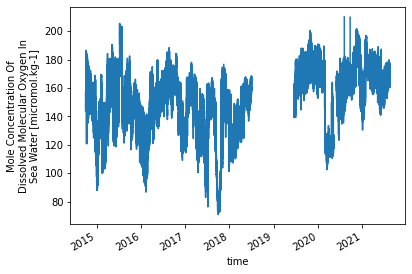

In [30]:
dsOPlat.doxygen.plot()

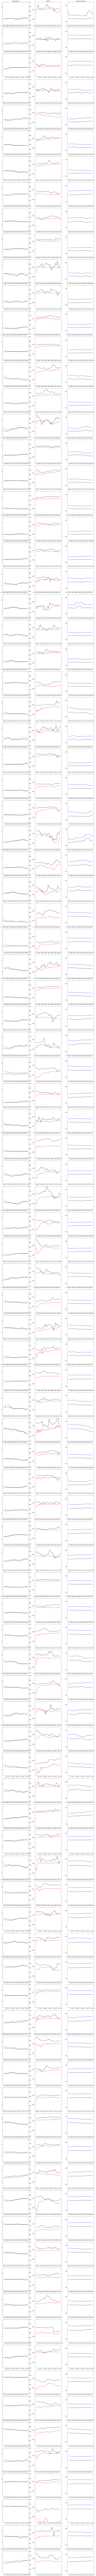

In [43]:
def RestComparisonChartSequence(df, yrng, chartstart=0, ncharts=100, chartstep=15):
    """
    Chart signals from profiler at rest compared to platform: Using a time axis, not depth.
      (Depth is taken to be comparable to within a couple of meters; but it would not hurt
      to flag any cases where this does not seem to be accurate.)
    """
    global dsOProf, dsOPlat, dsSProf, dsSPlat, dsTProf, dsTPlat
    
    chartstop = chartstart + ncharts*chartstep
    changed_chart_parameters = False
    while chartstop >= len(df): 
        changed_chart_parameters = True
        chartstop -= chartstep
        ncharts -= 1
    if changed_chart_parameters:
        print("only", len(df), "profiles available. Consequently the chart")
        print("  start/stop/step values have been modified to", chartstart, chartstop, chartstep)
 
    fig, axs = plt.subplots(ncharts, 3, figsize=(15, 4*ncharts), tight_layout=True)

    axstwin0 = [axs[i][0].twinx() for i in range(ncharts)]
    axstwin1 = [axs[i][0].twinx() for i in range(ncharts)]
    axstwin2 = [axs[i][0].twinx() for i in range(ncharts)]

    for i in range(chartstart, chartstop, chartstep):

        # iC is a Counter index 0, 1, 2, ... for charts, in contrast to a df[] row index for profiles
        # note a division returns a float and must be recast as an integer to be used as an index
        iC = int((i - chartstart)/chartstep)

        tr0, tr1 = df["rest_start"][i], df["rest_end"][i]
        
        dsOProfRest = dsOProf.sel(time=slice(tr0,  tr1))
        dsOPlatRest = dsOPlat.sel(time=slice(tr0,  tr1))
        dsSProfRest = dsSProf.sel(time=slice(tr0,  tr1))
        dsSPlatRest = dsSPlat.sel(time=slice(tr0,  tr1))
        dsTProfRest = dsTProf.sel(time=slice(tr0,  tr1))
        dsTPlatRest = dsTPlat.sel(time=slice(tr0,  tr1))

        axs[iC][0].plot(dsTProfRest.time, dsTProfRest.temp, markersize = 4., color='g', markerfacecolor='g')
        axs[iC][0].plot(dsTPlatRest.time, dsTPlatRest.temp, markersize = 4., color='k', markerfacecolor='k')
        axs[iC][1].plot(dsSProfRest.time, dsSProfRest.salinity, markersize = 4., color='r', markerfacecolor='r')
        axs[iC][1].plot(dsSPlatRest.time, dsSPlatRest.salinity, markersize = 4., color='k', markerfacecolor='k')
        axs[iC][2].plot(dsOProfRest.time, dsOProfRest.doxygen, markersize = 4., color='b', markerfacecolor='b')
        axs[iC][2].plot(dsOPlatRest.time, dsOPlatRest.doxygen, markersize = 4., color='k', markerfacecolor='k')
        
        # axis ranges
        if iC == 0: 
            axs[iC][0].set(title='Temperature')
            axs[iC][1].set(title='Salinity')
            axs[iC][2].set(title='Dissolved Oxygen')

        # label the date
        axstwin0[iC].set_xlabel(str(tr0), color='b')
        
        axs[iC][0].locator_params(axis='x', nbins=2)
        axs[iC][0].locator_params(axis='y', nbins=2)
        axs[iC][1].locator_params(axis='x', nbins=2)
        axs[iC][1].locator_params(axis='y', nbins=2)
        axs[iC][2].locator_params(axis='x', nbins=2)
        axs[iC][2].locator_params(axis='y', nbins=2)
        
        axs[iC][0].set(ylim   = (yrng[0][0], yrng[0][1]))
        axs[iC][1].set(ylim   = (yrng[1][0], yrng[1][1]))
        axs[iC][2].set(ylim   = (yrng[2][0], yrng[2][1]))

yrng = [(6.5, 8.5), (33.82, 33.94), (80., 220.)]
RestComparisonChartSequence(df, yrng, 3, 100, 15)

In [44]:
tRange0 = dt64('2018-03-01')
tRange1 = dt64('2018-04-01')
dfRange = df[(df['ascent_start'] >= tRange0) & (df['ascent_start'] <= tRange1)]
dfRange

,ascent_start,ascent_end,descent_start,descent_end,rest_start,rest_end
502,2018-03-01 00:45:00,2018-03-01 01:49:00,2018-03-01 01:49:00,2018-03-01 02:22:00,2018-03-01 02:22:00,2018-03-01 03:00:00
503,2018-03-01 03:00:00,2018-03-01 04:04:00,2018-03-01 04:04:00,2018-03-01 04:37:00,2018-03-01 04:37:00,2018-03-01 05:10:00
504,2018-03-01 05:10:00,2018-03-01 06:14:00,2018-03-01 06:14:00,2018-03-01 06:48:00,2018-03-01 06:48:00,2018-03-01 07:40:00
505,2018-03-01 07:40:00,2018-03-01 08:45:00,2018-03-01 08:45:00,2018-03-01 10:13:00,2018-03-01 10:13:00,2018-03-01 11:30:00
506,2018-03-01 11:30:00,2018-03-01 12:33:00,2018-03-01 12:33:00,2018-03-01 13:06:00,2018-03-01 13:06:00,2018-03-01 13:50:00
...,...,...,...,...,...,...
752,2018-03-31 11:30:00,2018-03-31 12:34:00,2018-03-31 12:34:00,2018-03-31 13:08:00,2018-03-31 13:08:00,2018-03-31 13:50:00
753,2018-03-31 13:50:00,2018-03-31 14:54:00,2018-03-31 14:54:00,2018-03-31 15:28:00,2018-03-31 15:28:00,2018-03-31 16:05:00
754,2018-03-31 16:05:00,2018-03-31 17:09:00,2018-03-31 17:09:00,2018-03-31 17:43:00,2018-03-31 17:43:00,2018-03-31 18:30:00
755,2018-03-31 18:30:00,2018-03-31 19:34:00,2018-03-31 19:34:00,2018-03-31 20:08:00,2018-03-31 20:08:00,2018-03-31 21:00:00
